## Accelerate Sensitivity Analysis & Model Calibration Using pyGSFLOW


<img src = "./figures/WorkFlow.PNG">





### Agenda
* Plot PRMS 2D data
* Change 2D data by a scalar factor
* Change zones in 2D maps using conditional masks
* Simple sensitivity analysis
* Comparing simulations and measurements
* Calibration


In [1]:
import os
from gsflow import GsflowModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## The GSFLOW model is loaded as follows
control_file = r"./data/sagehen/gsflow/saghen_new_cont.control"
gs = GsflowModel.load_from_file(control_file)


Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks array...
   loading eps array...
   loading thts array...
stress period 1:
   loading finf array...
stress period 2:
MOSFLOW files are loaded ... 


In [3]:
#gs.prms.Data.data_df.to_csv("temp.csv")
gs.prms.parameters.record_names

['ncascade',
 'ncascdgw',
 'ndays',
 'ndepl',
 'ndeplval',
 'nevap',
 'ngw',
 'ngwcell',
 'nhru',
 'nhrucell',
 'nlake',
 'nlake_hrus',
 'nmonths',
 'nobs',
 'nrain',
 'nreach',
 'nsegment',
 'nsnow',
 'nsol',
 'nssr',
 'nsub',
 'ntemp',
 'one',
 'adjmix_rain',
 'basin_tsta',
 'carea_max',
 'dday_intcp',
 'dday_slope',
 'fastcoef_lin',
 'fastcoef_sq',
 'gwflow_coef',
 'hru_percent_imperv',
 'hru_subbasin',
 'hru_tlaps',
 'hru_tsta',
 'jh_coef',
 'pref_flow_den',
 'rain_adj',
 'sat_threshold',
 'slowcoef_lin',
 'slowcoef_sq',
 'smidx_coef',
 'snow_adj',
 'soil_moist_max',
 'soil_rechr_max',
 'ssr2gw_rate',
 'subbasin_down',
 'tmax_allrain',
 'tmax_allsnow',
 'tmax_lapse',
 'tmin_lapse',
 'tsta_elev',
 'cascade_flg',
 'cascade_tol',
 'circle_switch',
 'gvr_cell_id',
 'gw_down_id',
 'gw_pct_up',
 'gw_strmseg_down_id',
 'gw_up_id',
 'hru_down_id',
 'hru_pct_up',
 'hru_strmseg_down_id',
 'hru_up_id',
 'albset_rna',
 'albset_rnm',
 'albset_sna',
 'albset_snm',
 'cecn_coef',
 'den_init',
 'de

### (1) Visualize PRMS data

In [4]:
print(gs.prms.parameters.get_record("ssr2gw_rate"))


####
ssr2gw_rate 10
1
nssr
6468
2
0.0
0.0
0.0
0.0.
.
.
####


In [5]:
Params = gs.prms.parameters
gs.prms.parameters.get_values("ssr2gw_rate")

array([0., 0., 0., ..., 0., 0., 0.])

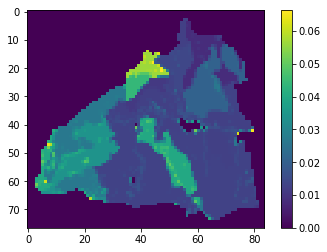

In [6]:
nrow = 77
ncol = 84
ssr2gw_rate = Params.get_values("ssr2gw_rate").reshape(nrow, ncol)
plt.imshow(ssr2gw_rate)
plt.colorbar();

In [7]:
# 2D data
param = gs.prms.parameters.get_record('rain_adj')
print(param)


####
rain_adj 10
2
nhru
nmonths
77616
2
1.223373
1.214444
1.205549
1.196689.
.
.
####


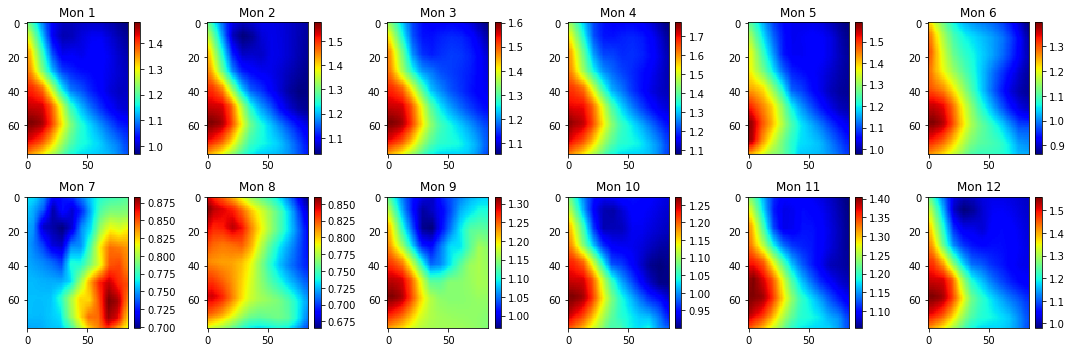

In [8]:
rainadj = gs.prms.parameters.get_values('rain_adj')
rainadj = rainadj.reshape(12,nrow,ncol)
fig = plt.figure(figsize=(15,5)); 
for mon in range(12): 
    txt = "Mon {}".format(mon+1)
    ax = plt.subplot(2,6,mon+1) 
    ax.set_title(txt)
    img = ax.imshow(rainadj[mon,:,:], cmap='jet')
    
    fig.colorbar(img, ax= ax)
    ax.set_aspect('auto')
plt.tight_layout(h_pad=1)    



### (2) Scale parameter by a scalar value

In this exercise, let us change the model mode to "PRMS" becuase it's quick to run it. The same exercise can be made using GSFLOW model; however, runing the model will take a longer period of time

In [9]:
gs.control.set_values("model_mode", ['PRMS'])

In [10]:
gs.write_input(workspace=r"./data/temp")

Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...


In [11]:
gs.gsflow_exe = os.path.abspath(r"../bin/gsflow.exe")
gs.run_model()

pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1997/03/31



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:14:49

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:15:06

Execu

(False, [])

In [12]:
gs.prms.get_StatVar()

Loading the statvar output file .....
Finished Load the statvar output file .....


,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
5,6,1982,8,6,0,0,0,1.506142,1.506142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014521,682.018484,0.000000,1982-08-06
6,7,1982,8,7,0,0,0,1.479687,1.479687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014152,656.759870,0.000000,1982-08-07
7,8,1982,8,8,0,0,0,1.615302,1.453752,0.107840,0.000377,0.053710,0.053742,0.000000,0.000000,0.000000,0.010582,490.368940,0.000000,1982-08-08
8,9,1982,8,9,0,0,0,1.457960,1.428326,0.000441,0.000002,0.029193,0.000000,0.000000,0.000000,0.000000,0.033824,646.020096,0.000000,1982-08-09
9,10,1982,8,10,0,0,0,1.430003,1.403399,0.000396,0.000001,0.026208,0.000000,0.000000,0.000000,0.000000,0.010115,630.676703,0.000000,1982-08-10


In [13]:
gs.prms.stat.stat_df


,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
5,6,1982,8,6,0,0,0,1.506142,1.506142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014521,682.018484,0.000000,1982-08-06
6,7,1982,8,7,0,0,0,1.479687,1.479687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014152,656.759870,0.000000,1982-08-07
7,8,1982,8,8,0,0,0,1.615302,1.453752,0.107840,0.000377,0.053710,0.053742,0.000000,0.000000,0.000000,0.010582,490.368940,0.000000,1982-08-08
8,9,1982,8,9,0,0,0,1.457960,1.428326,0.000441,0.000002,0.029193,0.000000,0.000000,0.000000,0.000000,0.033824,646.020096,0.000000,1982-08-09
9,10,1982,8,10,0,0,0,1.430003,1.403399,0.000396,0.000001,0.026208,0.000000,0.000000,0.000000,0.000000,0.010115,630.676703,0.000000,1982-08-10


In [14]:
basic_cfs_before = gs.prms.stat.stat_df['basin_cfs_1'].values

### Adjusting values for calibration

we can use pygsflow to change parameter values and display the results of our adjustments

we'll start by adjusting `rain_adj` and `snow_adj`

In [15]:
## save a copy of rain_adj before we change ir
rain_adj_backup = np.copy(gs.prms.parameters.get_values('rain_adj'))
snow_adj_backup = np.copy(gs.prms.parameters.get_values('snow_adj'))

In [16]:
## Let us just remove the effect of rain by assiging rain adj factor to 0.0
newrainadj = rain_adj_backup * 0.0
gs.prms.parameters.set_values('rain_adj', newrainadj)
gs.prms.parameters.set_values('snow_adj', 0.0 * snow_adj_backup)

# Write input files
gs.write_input(workspace=r"./data/temp/prms_files")

# run
gs.run_model()

# Get results
gs.prms.get_StatVar() 
basic_cfs_after = gs.prms.stat.stat_df['basin_cfs_1'].values

Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\prms_files\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results outp

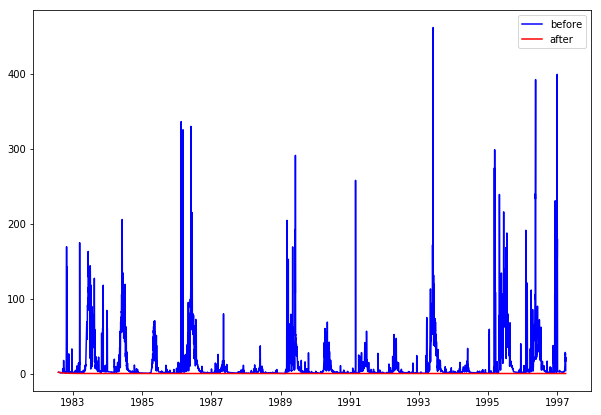

In [17]:
dates = gs.prms.stat.stat_df['Date'].values
plt.figure(figsize=(10,7))
plt.plot(dates, (basic_cfs_before), 'b', label = 'before' )
plt.plot(dates,(basic_cfs_after), 'r', label = 'after' )
plt.legend()

### (2) Use "array masking" to change parameters


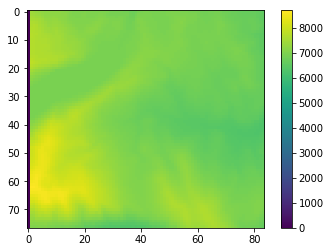

In [18]:
# masking
Params = gs.prms.parameters
hru_elev = np.copy(Params.get_values("hru_elev"))
hru_elev = hru_elev.reshape(nrow, ncol)
plt.imshow(hru_elev)
plt.colorbar();

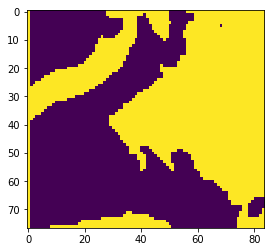

In [19]:
mask = hru_elev<7000
plt.imshow(mask); # ; plt.colorbar()

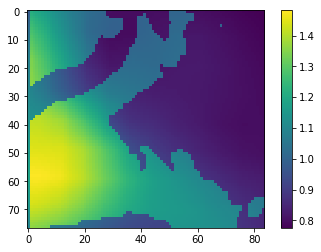

In [20]:
rain_adj_jan = np.copy(rainadj[0,:,:])
rain_adj_jan[mask] = rain_adj_jan[mask] * 0.8
plt.imshow(rain_adj_jan)
plt.colorbar();

### Can you change `ssr2_gw_rate` values in subbasin 10?

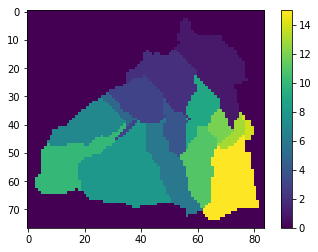

In [21]:
hru_subbasin = gs.mf.uzf.irunbnd.array
plt.imshow(hru_subbasin)
plt.colorbar();

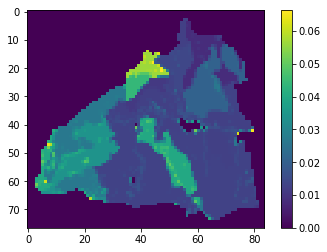

In [22]:
ssr2gw_rate = Params.get_values("ssr2gw_rate").reshape(nrow, ncol)
plt.imshow(ssr2gw_rate)
plt.colorbar();

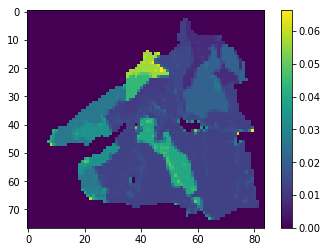

In [23]:
ssr2gw_rate[hru_subbasin==10] = ssr2gw_rate[hru_subbasin==10] * 0.0
plt.imshow(ssr2gw_rate)
plt.colorbar();

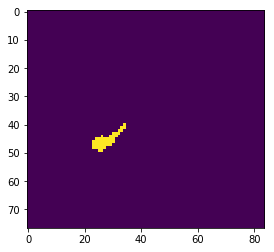

In [24]:
# The mask can also be complex 
mask2 = np.logical_and(hru_subbasin==10, hru_elev <7500)
plt.imshow(mask2);

## (3) Sensitivity Analysis

Before Calibration, let us do sensitivity analysis.... a simple one!

In [25]:
%%time
#parameters = ['gwflow_coef', 'gwsink_coef', 'ssr2gw_rate', 'slowcoef_lin', 'slowcoef_sq', 'smidx_coef', 
#              'snarea_curve', 'snarea_thresh']

parameters = ['snarea_curve', 'ssr2gw_rate',  'gwflow_coef']
control_file = r"./data/sagehen/gsflow/saghen_new_cont.control"


# load model files
gs = GsflowModel.load_from_file(control_file=control_file)
gs.gsflow_exe = os.path.abspath(r"../bin/gsflow.exe")

# Let us use PRMS
gs.control.set_values("model_mode", ['PRMS'])
gs.control.set_values("print_debug", [-1]) # this will turn off screen printout and reduce output to the notebook
gs.control.set_values(name='end_time', values=[1990,1,1,0,0,0])

Params = gs.prms.parameters

# Save a copy of parameter values before they changes
orig_params = {}
for par in parameters:
    orig_params[par] = np.copy(Params.get_values(par))

orig_params

Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks array...
   loading eps array...
   loading thts array...
stress period 1:
   loading finf array...
stress period 2:
MOSFLOW files are loaded ... 
Wall time: 2.68 s


##### Automation of Sensitivity Analysis
We are going to use two loops: loop over parameters and loop over scaling factor. Within the parameter loop, the values of the parameter will be changed by multipling it by a list of scaling factors.

In [26]:
%%time
# Parameters to be explored....
#parameters = ['gwflow_coef', 'gwsink_coef', 'ssr2gw_rate', 'slowcoef_lin', 'slowcoef_sq', 'smidx_coef',
#              'snarea_curve', 'snarea_thresh']
parameters = ['snarea_curve', 'ssr2gw_rate',  'gwflow_coef']
factors = [0.5, 0.75, 1.0, 1.25, 1.5]
all_sens = {}

## Nested Loop
for par in parameters: # loop over parameters   
    responce = []
    for facc in factors: # loop over scaling factor       
        print("\n****** Par =  {}, Facc = {} ****** ".format(par, facc))
        
        Params.set_values(name=par, values = orig_params[par]*facc) # change the parameter  
        
        gs.write_input(workspace=r"./data/temp")                   # write input
        
        gs.run_model()                                              # run the model and wait for results
        
        gs.prms.get_statVar()                                       # load results from Statvar 
        
        mean_outflow = gs.prms.stat.stat_df['basin_cfs_1'].mean()   # compute the mean stream flow
        
        responce.append(mean_outflow)                               # save results
    
    all_sens[par] = responce
    Params.set_values(name=par, values = orig_params[par])



****** Par =  snarea_curve, Facc = 0.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no m

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_res

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 1.0 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 1.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_res

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 1.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 0.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 1.0 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 1.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 1.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 0.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 1.0 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 1.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resu

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....

****** Par =  gwflow_coef, Facc = 1.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

c:\users\jlarsen\desktop\usgs-pygsflow\trunk\gsflow\prms\prms_model.py:120: PendingDeprecationWarning: get_statVar is Deprecated, use get_StatVar()
  warnings.warn(err, PendingDeprecationWarning)


Finished Load the statvar output file .....
Wall time: 2min 50s


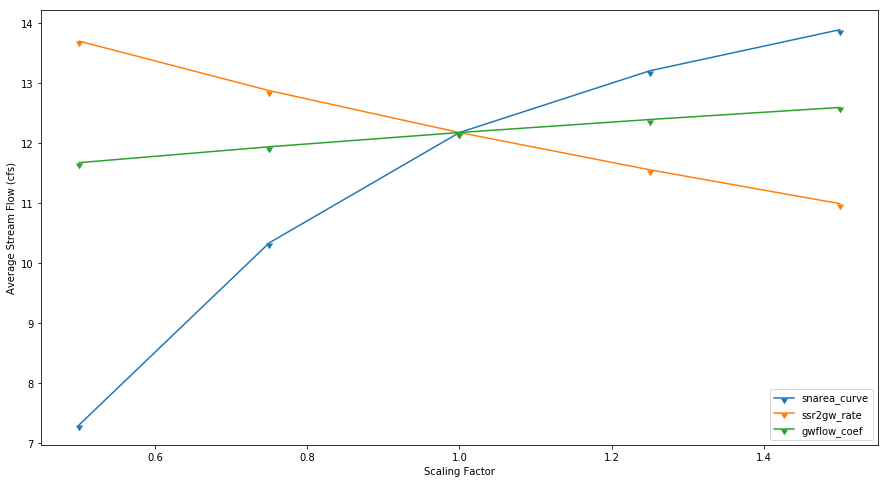

In [27]:
plt.figure(figsize=(15,8))
for par in all_sens.keys():
    plt.plot(factors, all_sens[par], label = par, marker=11 )
plt.ylabel("Average Stream Flow (cfs)")
plt.xlabel("Scaling Factor")
plt.legend()
    


## (4) Simple Calibration 


### (4.a) Error Evaluation


In [28]:
# Before we start let us load the model
control_file = r"./data/sagehen/gsflow/saghen_new_cont.control"
gs = GsflowModel.load_from_file(control_file)
gs.gsflow_exe = os.path.abspath(r"../bin/gsflow.exe")
gs.control.set_values("model_mode", ['PRMS']) # todo: remove list requirement when no list is necessary. Provide check on datatype
gs.control.set_values("print_debug", [-1]) # this will turn off screen printout and reduce output to the notebook
gs.control.set_values(name='end_time', values=[1990,1,1,0,0,0])
Params = gs.prms.parameters

gs.write_input(workspace=r"./data/temp")              # write input
gs.run_model()                                         # run the model
gs.prms.get_StatVar()  
# gs.run_model()   


Control file is loaded
Working on loading PRMS model ...
Prms model loading ...
PRMS model loaded ...
Working on loading MODFLOW files ....
   loading iuzfbnd array...
   loading irunbnd array...
   loading vks array...
   loading eps array...
   loading thts array...
stress period 1:
   loading finf array...
stress period 2:
MOSFLOW files are loaded ... 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        C

,ID,Year,Month,Day,Hour,Minute,Second,basin_cfs_1,basin_gwflow_cfs_1,basin_sroff_cfs_1,basin_dunnian_1,basin_ssflow_cfs_1,basin_ppt_1,basin_snow_1,basin_pweqv_1,basin_snowcov_1,basin_actet_1,basin_potsw_1,basin_recharge_1,Date
0,1,1982,8,1,0,0,0,1.646627,1.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019600,680.605620,0.000000,1982-08-01
1,2,1982,8,2,0,0,0,1.617396,1.617396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011927,649.570046,0.000000,1982-08-02
2,3,1982,8,3,0,0,0,1.588744,1.588744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012544,611.057569,0.000000,1982-08-03
3,4,1982,8,4,0,0,0,1.560659,1.560659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012443,629.305791,0.000000,1982-08-04
4,5,1982,8,5,0,0,0,1.533129,1.533129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012764,671.293030,0.000000,1982-08-05
5,6,1982,8,6,0,0,0,1.506142,1.506142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014521,682.018484,0.000000,1982-08-06
6,7,1982,8,7,0,0,0,1.479687,1.479687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014152,656.759870,0.000000,1982-08-07
7,8,1982,8,8,0,0,0,1.615302,1.453752,0.107840,0.000377,0.053710,0.053742,0.000000,0.000000,0.000000,0.010582,490.368940,0.000000,1982-08-08
8,9,1982,8,9,0,0,0,1.457960,1.428326,0.000441,0.000002,0.029193,0.000000,0.000000,0.000000,0.000000,0.033824,646.020096,0.000000,1982-08-09
9,10,1982,8,10,0,0,0,1.430003,1.403399,0.000396,0.000001,0.026208,0.000000,0.000000,0.000000,0.000000,0.010115,630.676703,0.000000,1982-08-10


#### Compare measurements and simulations

,Year,Month,Day,Hour,Minute,Second,tmax_0,tmin_0,precip_0,runoff_0,Date
10531,1982,8,1,0,0,0,79,49,0.000,7.2,1982-08-01
10532,1982,8,2,0,0,0,74,28,0.000,7.2,1982-08-02
10533,1982,8,3,0,0,0,70,40,0.000,7.0,1982-08-03
10534,1982,8,4,0,0,0,72,38,0.000,6.9,1982-08-04
10535,1982,8,5,0,0,0,79,31,0.000,6.7,1982-08-05
10536,1982,8,6,0,0,0,84,36,0.000,6.5,1982-08-06
10537,1982,8,7,0,0,0,77,47,0.000,6.8,1982-08-07
10538,1982,8,8,0,0,0,78,42,1.778,6.8,1982-08-08
10539,1982,8,9,0,0,0,76,39,0.000,6.3,1982-08-09
10540,1982,8,10,0,0,0,74,33,0.000,5.9,1982-08-10


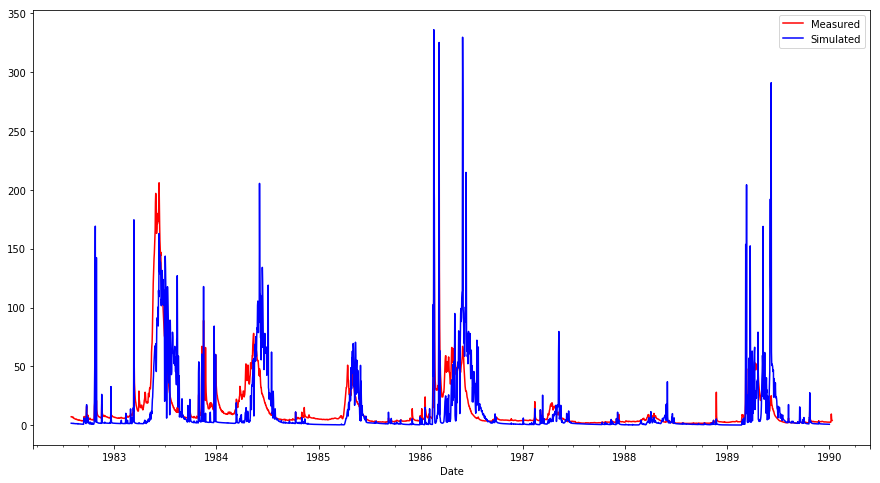

In [29]:
# Dialy Stream flow
# get measurments within the simulation period...
meas_data = gs.prms.data.data_df  # Data object in PRMS
mask = np.logical_and(meas_data['Date']>=pd.Timestamp('1982-08-01'),  meas_data['Date']<=pd.Timestamp('1990-01-11'))
measure_data = gs.prms.data.data_df[mask]

# get simulation results
simData = gs.prms.stat.stat_df  # Results from StatVar file

# plot simulated vs. measured flow
ax = measure_data.plot(x= 'Date' , y= 'runoff_0', color = 'r', label = 'Measured')
simData.plot(ax=ax, x= 'Date' , y= 'basin_cfs_1', color = 'b', label = 'Simulated', figsize = (15,8))
plt.legend()
measure_data

#### Monthly Stream flow


Text(0,0.5,'Simulated flow (cfs)')

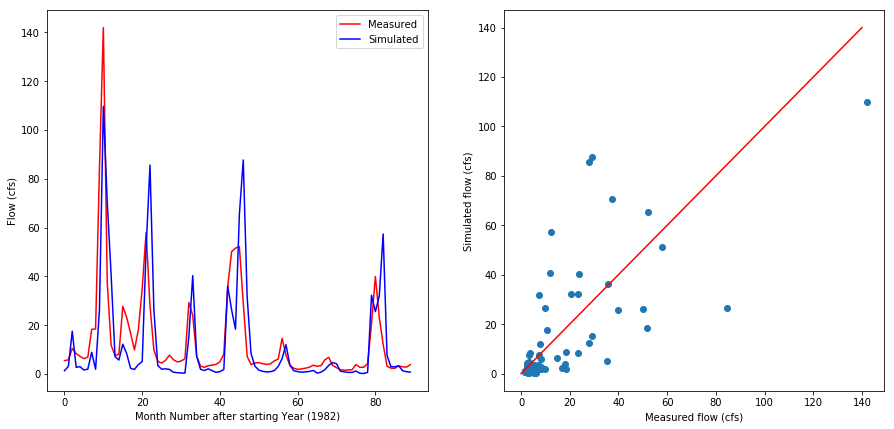

In [30]:
# Monthly average for streamflow measurements
monthly_meas = measure_data.groupby([measure_data.Date.dt.year, measure_data.Month]).mean()
monthly_sim = simData.groupby([simData.Date.dt.year, simData.Month]).mean()

# Plots
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(monthly_meas['runoff_0'].values, 'r', label = 'Measured')
plt.plot(monthly_sim['basin_cfs_1'].values, 'b', label = 'Simulated')
plt.xlabel("Month Number after starting Year (1982)")
plt.ylabel("Flow (cfs)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(monthly_meas['runoff_0'].values,monthly_sim['basin_cfs_1'].values ); plt.plot([0,140],[0,140],'r')
plt.xlabel("Measured flow (cfs)")
plt.ylabel("Simulated flow (cfs)")


### (4.b) Compute Error Metric

In [31]:
def calculate_error(gs):
    """
    This function calculates mean squared error for simulated stream flow.
    """
    meas_data = gs.prms.data.data_df # get measured data
    # Get data for simulated period
    mask = np.logical_and(meas_data['Date']>=pd.Timestamp('1982-08-01'),  meas_data['Date']<=pd.Timestamp('1990-01-01'))    
    measure_data = gs.prms.data.data_df[mask]
    
    # get simulated values
    simData = gs.prms.stat.stat_df
    
    # compute error
    err = simData['basin_cfs_1'].values - measure_data['runoff_0'].values
    # compute mean squared error
    rmse = (np.mean(np.power(err, 2.0)))**0.5
    return rmse

### (4.c) Simple Calibration
Change one parameter at a time. This method can be useful when input parameters are independent.
<img src = ".\figures\calibration_cycle.png">

In [32]:
orig_params.keys()

dict_keys(['snarea_curve', 'ssr2gw_rate', 'gwflow_coef'])

In [33]:
%%time
parameters = ['gwflow_coef', 'snarea_curve', 'ssr2gw_rate']
factors = [ 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
all_errors = {}
for par in parameters:    
    errors = []
    for facc in factors:
        print("\n****** Par =  {}, Facc = {} ****** ".format(par, facc))
        
        # change input parameters
        Params.set_values(name=par, values = orig_params[par]*facc) # change the parameter
        
        # write input files
        gs.write_input(workspace=r"./data/temp")              # write input
        
        # run the model
        gs.run_model()                                              # run the model
        
        # load the results
        gs.prms.get_StatVar()                                       # load load results from Statvar 
        
        # calculate the error
        err = calculate_error(gs)                                    # compute the mean square error
        errors.append(err)
        
    all_errors[par] = errors
    Params.set_values(name=par, values = orig_params[par])
   



****** Par =  gwflow_coef, Facc = 0.75 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no m

Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:

Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:19:49

Execution end   date and 

 WARNING, map_results requested with nmapOutVars equal 0
 no map_results output is produced

Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:20:25

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:20:32

Execution elapsed time    0 minutes  7.57 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 1.5 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\D


Simulation time period: 1982/08/01 - 1990/01/01



                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:20:57

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:21:05

Execution elapsed time    0 minutes  7.68 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  snarea_curve, Facc = 2.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\


                          Normal completion of GSFLOW

Execution start date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:21:28

Execution end   date and time (yyyy/mm/dd hh:mm:ss) 2019/02/22 15:21:35

Execution elapsed time    0 minutes  7.52 seconds














         set in the Parameter File. Module default values are being used.
Loading the statvar output file .....
Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 1.25 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflo

Finished Load the statvar output file .....

****** Par =  ssr2gw_rate, Facc = 2.0 ****** 
Writing the project files .....

changing model workspace...
   C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe

(base) C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp>C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\bin\gsflow.exe C:\Users\jlarsen\Desktop\usgs-pygsflow\trunk\examples\data\temp\saghen_new_cont.control 


                          U.S. Geological Survey
        Coupled Groundwater and Surface-water FLOW model (GSFLOW)
                         Version 1.2.2 02/23/2018

    An integration of the Precipitation-Runoff Modeling System (PRMS)
    and the Modular Groundwater Model (MODFLOW-NWT and MODFLOW-2005)

 WARNING, map_resul

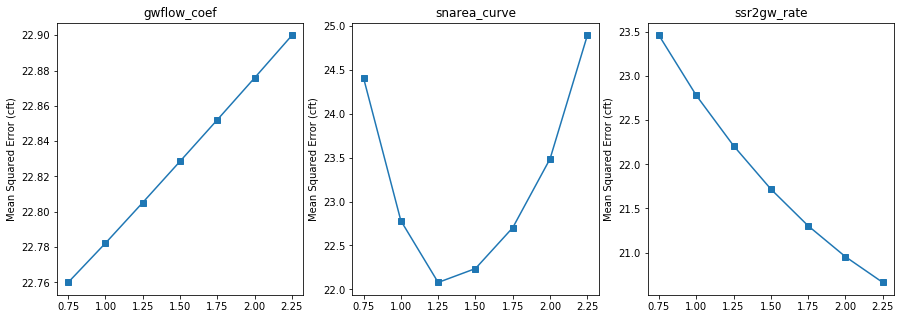

In [34]:
plt.figure(figsize=(15,5))
i = 1
for par in all_errors.keys():
    plt.subplot(1,3,i)
    plt.plot(factors, all_errors[par], label = par, marker='s' )
    plt.ylabel("Mean Squared Error (cft)")
    i = i + 1
    plt.title(par)

plt.show()
    

### Remember: This calibration method is usefull only if input parameters are independent. In PEST, the parameter are changed concurrently.